In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_hub as hub



In [2]:
image_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

img_data_train=image_generator.flow_from_directory('C:\\Users\\sovin\\Desktop\\AUTOWASTAGATOR\\DATASET\\TRAIN',
                                             target_size=(224,224),subset='training'
                                             )

img_data_val=image_generator.flow_from_directory('C:\\Users\\sovin\\Desktop\\AUTOWASTAGATOR\\DATASET\\TRAIN',
                                             target_size=(224,224),#Batch size can be changed ,by default its 32
                                             subset='validation') 

Found 26875 images belonging to 3 classes.
Found 6718 images belonging to 3 classes.


In [3]:
img_data_train.class_indices

{'D': 0, 'P': 1, 'W': 2}

In [4]:
for sample_batch,sample_label in img_data_train:
    print(sample_batch.shape)
    print(sample_label.shape)
    break

(32, 224, 224, 3)
(32, 3)


In [5]:
class_names=['Dry',"Plastic",'Wet']

In [6]:
def display(img_batch,label_batch):
    plt.figure(figsize=(10,9))
    plt.subplots_adjust(wspace=0.7,hspace=0.7)
    for i in range(30):
        plt.subplot(6,5,i+1)
        plt.imshow(img_batch[i])
        plt.title(class_names[np.argmax(label_batch[i])])


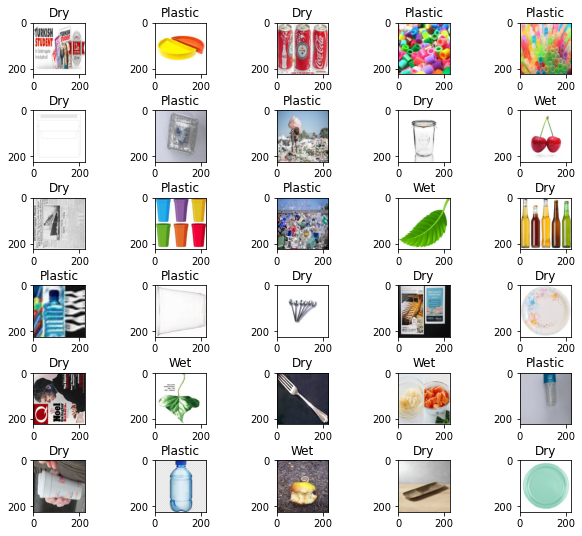

In [7]:
display(sample_batch,sample_label)

In [8]:
feature_extract_url="https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"

    
feature_extraction_layer=hub.KerasLayer(str(feature_extract_url),input_shape=(224,224,3))

feature_extraction_layer.trainable=False

In [9]:

model=tf.keras.Sequential([
feature_extraction_layer,
tf.keras.layers.Dense(img_data_train.num_classes,activation='sigmoid')
])
 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [10]:

steps=np.ceil(img_data_train.samples/img_data_train.batch_size)

history=model.fit(img_data_train,epochs=1,validation_data=img_data_val,steps_per_epoch=steps)

840/840 [==============================] - 3994s 5s/step - loss: 0.3658 - accuracy: 0.8563 - val_loss: 0.3632 - val_accuracy: 0.8626


In [11]:
test_data=image_generator.flow_from_directory("C:\\Users\\sovin\\Desktop\\AUTOWASTAGATOR\\DATASET\\TEST",
                                             target_size=(224,224),#Batch size can be changed ,by default its 32
                                             )

model.evaluate(test_data)

Found 5102 images belonging to 3 classes.
160/160 [==============================] - 579s 4s/step - loss: 0.5216 - accuracy: 0.8011


[0.5216450691223145, 0.8010584115982056]

In [12]:
model.save("waste_classifier.h5")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              23561152  
_________________________________________________________________
dense (Dense)                (None, 3)                 6147      
Total params: 23,567,299
Trainable params: 6,147
Non-trainable params: 23,561,152
_________________________________________________________________


Input img shape: (1, 224, 224, 3)


Text(0.5, 1.0, 'Material is Wet')

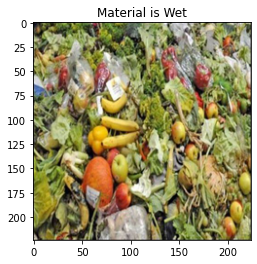

In [18]:
import numpy as np
from keras.preprocessing import image
from PIL import Image

img_path='C:\\Users\\sovin\\Desktop\\AUTOWASTAGATOR\\image4.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=x/255
print('Input img shape:',x.shape)

my_img=Image.open(img_path)
my_img=my_img.resize((224,224))
plt.imshow(my_img)
pred=model.predict(x)
plt.title(f'Material is {class_names[np.argmax(pred)]}')